<a href="https://colab.research.google.com/github/Rogerio-mack/Temporal/blob/main/cap1_IntrodTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução Informal às Séries Temporais** 

___


Neste capítulo você vai:

* Aprender o que são Séries Temporais e tarefas de interesse relacionadas a elas
* Entender como é decomposta uma Série Temporal em Tendência, Ciclos, Sazonalidade e Resíduos
* Como empregar o `Python` para iniciar a sua análise de Séries Temporais





Séries Temporais desempenham um papel importante no nosso dia a dia. Fenômenos físicos, transações de negócios, dispositivos produzem constantemente dados ao longo do tempo. Esses dados podem, então, serem empregados para previsões, análises etc. Neste capítulo você vai entender o que caracteriza esses dados que conhecemos como Séries Temporais, como elas podem ser descompostas em dados mais simples para análise e como empregar o `Python` para iniciar a manipulação dessas séries dados.




## Uma nota para ler este capítulo

Todos exemplos e figuras aqui apresentados foram produzidos empregando `Python`. Você pode acessar todos os códigos empregados no site do livro, [*tsp book site*](https://github.com/Rogerio-mack/Temporal). Exceto na última parte, *Um Guia Rápido para Trabalhar com Séries em `Python`* que é mais prática, este capítulo introduz uma série de conceitos sobre as Séries Temporais. Assim, os códigos são empregados em sua maioria apenas para produzir resultados que queremos mostrar e você não precisará se preocupar com eles, a menos que tenha interesse. 

# Séries Temporais

> **Uma *Série Temporal* é uma sequência de observações registradas em intervalos de tempo regulares.**

Essas observações são *medidas* tomadas ou encontradas a tempos regulares. Você certamente já encontrou dados como: 

* Os valores anuais do PIB
* Os preços diários de ações e commodities 
* Volume horário de transações de cartões crédito
* Faturamento ou volume vendas mensal de um negócio 
* Quantidade de *hits* diários em página Web ou site
* A quantidade de emissões de CO2 ou o aumento de temperatura anuais no mundo

Todos esses são dados muito comuns medidos a intervalos regulares, hora a hora, diários, mensais etc. podendo haver séries ainda com intervalos muito curtos, de segundos ou milisegundos, como algumas séries encontradas na física e na biomedicina, ou séries com intervalos muito longos, de décadas  ou  mais, encontradas na astronomia e geologia. Aqui você encontrará a maior parte dos exemplos empregando as séries mais comuns, como séries diárias a mensais, mas os procedimentos que você encontrará podem ser igualmente aplicados a qualquer série.






 



In [1]:
#@markdown imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt             
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker

from datetime import datetime as dt

path = 'https://github.com/Rogerio-mack/Temporal/raw/main/Data/'
plt.style.use([ 'grayscale' , 'https://github.com/Rogerio-mack/Temporal/raw/main/tsp.mplstyle' ])

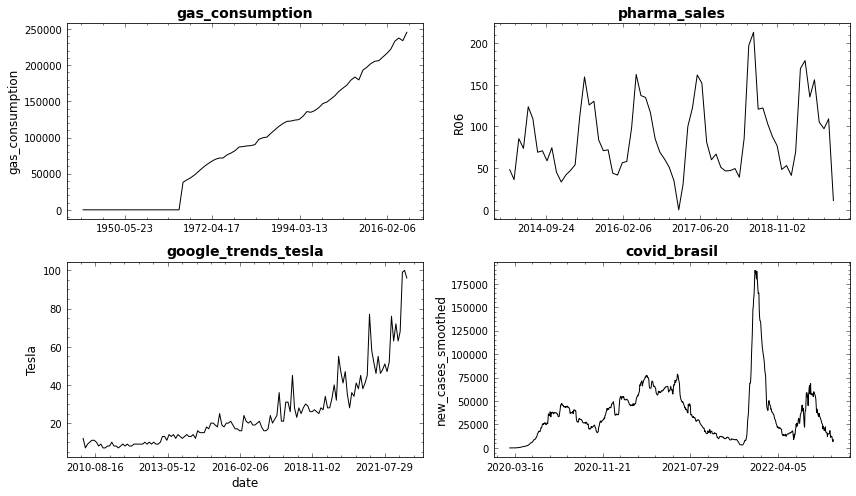

In [2]:
#@markdown Exemplos de Séries Temporais

datasets = pd.read_csv(path + 'datasets.csv', index_col=0) 
# display(datasets.head())

fig, ax = plt.subplots(2,2,figsize=(12,7))

show_files = ['gas_consumption.csv', 'pharma_sales.csv', 'google_trends_tesla.csv', 'covid_brasil.csv' ]

# for fname in datasets['file_name'].unique():
# for i, axis in enumerate(ax.reshape(-1)):
for i, axis in enumerate(fig.axes):
# for axis in ax.reshape(-1):

  df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
  # display(df.head())

  sns.lineplot(x=df.index, y=df[ df.columns[0] ], ax=axis)
  axis.set_title(show_files[i].split('.csv')[0])

  axis.xaxis.set_major_locator(ticker.MaxNLocator(5))

plt.tight_layout()
plt.show()

**Figura 1. Exemplos de Séries Temporais. Gas Consumption: Evolução do Consumo de Gás para a geração de energia elétrica no mundo; Pharma Sales:  Volume de Venda Mensal de Anti-Histamínicos para uso Sistêmico; Google Trends Tesla:  Google Trends, quantidade de buscas normalizadas da palavra chave Tesla no Google; Covid Brasil:  Número ajustado de novos casos de COVID no Brasil.**

In [3]:
#@markdown Descrição
for fname in show_files:
  print(datasets[ datasets.file_name == fname ]['name'].values[0] + ':  ' +
          datasets[ datasets.file_name == fname ]['short_description'].values[0])

Gas Consumption:  Evolução do Consumo de Gás para a geração de energia elétrica no mundo
Pharma Sales:  Volume de Venda Mensal de Anti-Histamínicos para uso Sistêmico
Google Trends Tesla:  Google Trends, quantidade de buscas normalizadas da palavra chave Tesla no Google
Covid Brasil:  Número ajustado de novos casos de COVID no Brasil


Diferentes tarefas podem ser aplicadas a uma Série Temporal e de acordo com o seu objetivo você pode estar interessado em:

1. Fazer previsões de valores futuros
1. Entender o mecanismo gerador da Série
1. Descrever o comportamento da Série 
1. Procurar periodicidades relevantes
1. Identificar Anomalias
1. Simular a Série de Dados

Certamente, fazer previsões de valores futuros é o mais comum e neste livro nos deteremos principalemente nos conceitos e ferramentas para esta tarefa. Nessas tarefas, é importante dizer, existem várias abordagens que podemos empregar. 

Em todos os casos a ideia é criar um *modelo probabilístico* da série. Um modelo é sempre uma simplificação útil e esses *modelos probabilísticos* permitem simplificar a série real de dados para que você possa melhor analisá-la. Neste livro trataremos unicamente de modelos que são baseados no *domínio do tempo*, como o modelo ARIMA, e que são em geral mais empregados. Empregar o *domínio do tempo* significa que modelamos os valores da séries em função da *variável* tempo. Outros modelos, como a Análise de Fourier e Análise Espectral, empregam o *domínio da frequência* para modelar séries de dados, e há ainda modelos de *Espaço de Estados*, dentre outros. Modelos no domínio do tempo são *modelos paramétricos* pois são empregados um número finitos de parâmetros. Modelos no *domínio da frequência* são modelos *não paramétricos* e encontram maior aplicação em campos como a física e a astronomia. Por último, vamos nos limitar a modelos que empregam unicamente procedimentos estatísticos sobre os dados e que têm aplicação geral em qualquer campo, diferentemente de modelos que empregam uma *teoria* subjacente, como os modelos econômicos utilizados em  *econometria*. 



# Decomposição de Séries Temporais

A idea de construir um modelo é a de criarmos uma simplificação útil para os nossos propósitos. No caso de Séries Temporais o modelo de Decomposição de uma Série em séries mais simples é o procedimento clássico e o que adotaremos aqui.

Em geral decompomos uma série temporal em componentes onde cada componente busca modelar um tipo de padrão ou comportamento da série. Na maior parte das vêzes você pode encontrar esses componentes em uma série de dados:

* **Tendência**
* **Sazonalidade**
* **Resíduos**

A **tendência** representa o comportamento da série no longo prazo, o aumento ou diminuição de longo prazo nos dados o que pode se dar de forma linear ou não, como o crescimento da temperatura global ano a ano. A componente **sazonalidade** representa o padrão sazonal da série como mundanças que ocorrem com alguma periodicidade ao longo do tempo. É o caso dos acréscimos e decréscimos de temperatura que ocorrem ao longo das estações do ano, independentemente da elevação das temperaturas ao longo prazo. Por último, os **resíduos** constituem uma parte sobra das mudanças e que não podemos explicar. É a componente estocástica (de modo informal, *aleatória*) dos dados. Eles explicam, por exemplo, às diferenças de temperatura entre dois dias consecutivos da mesma estação causadas por inúmeros fatores que podem ir da maior presença de nuvens e raios solares, ao período do ciclo lunar naqueles dias. Você também pode encontrar essa componente sendo denominada de *erro aleatório* ou ainda *ruído branco*. 

Em geralmente combinamos a tendência a uma outra componente das séries que denominamos **ciclo** e que por simplicidade denominamos unicamente de  tendência. 

> **Sazonalidade $\times$ Ciclos. Ciclos e mudanças sazonais são comportamentos bem diferentes nas séries temporais. A sazonalidade é um comportamento recorrente que se repete a intervalos fixos, regulares (a maior temperatura em certas estações do ano, o maior número de visitas em um site de entretenimento aos finais de semana). Já os ciclos são comportamentos recorrentes mas que ocorrem a intervalos não regulares. Vulcões e terremotos, por exemplo, têm um comportamento recorrente, mas não sabemos quando irão ocorrer, e uma série que represente as temperaturas ou o tremor em torno da cratera do Vulcão [Eyjafjallajökull](https://pt.wikipedia.org/wiki/Eyjafjallaj%C3%B6kull) apresentará comportamentos repetivos, mas que não são sazonais (com periodicidade regular). O mesmo ocorre com as crises econômicas. Elas impõem ciclos econômicos que alternam recessão e crescimento, mas não sabemos quando irá ocorrer a próxima crise do petróleo ou próximo estouro da *bolha* de um determinado setor.** 

Você mesmo pode pensar em vários exemplos de cada um desses comportamentos. Esses comportamentos não aparecem todos obrigatóriamente em todas as séries. Uma série temporal pode apresentar uma certa tendência, mas não apresentar qualquer comportamento sazonal. 



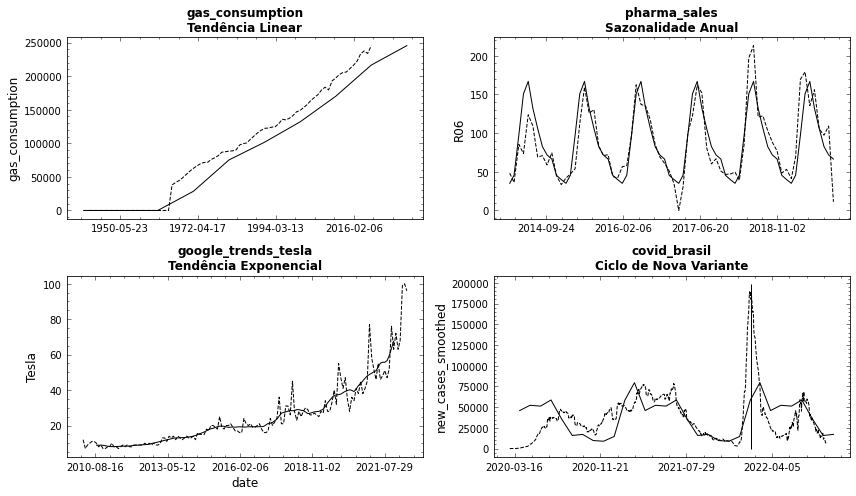

In [4]:
#@markdown Tendência, Sazonalidade e Ciclos
from statsmodels.tsa.seasonal import seasonal_decompose

fig, ax = plt.subplots(2,2,figsize=(12,7))

show_files = ['gas_consumption.csv', 'pharma_sales.csv', 'google_trends_tesla.csv', 'covid_brasil.csv' ]

i = 0
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
decomp = seasonal_decompose(df)

sns.lineplot(x=df.index, y=df[ df.columns[0] ], ax=fig.axes[i], linestyle='dashed')
sns.lineplot(x=decomp.trend.resample('10Y').mean().index, y=decomp.trend.resample('10Y').mean(), ax=fig.axes[i], color='black')
fig.axes[i].set_title(show_files[i].split('.csv')[0] + '\nTendência Linear', fontsize=12)

fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

i = 1
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
decomp = seasonal_decompose(df)

sns.lineplot(x=df.index, y=df[ df.columns[0] ], ax=fig.axes[i], linestyle='dashed')
sns.lineplot(x=decomp.seasonal.index, y=decomp.seasonal + df[ df.columns[0] ].mean(), ax=fig.axes[i], color='black')
fig.axes[i].set_title(show_files[i].split('.csv')[0] + '\nSazonalidade Anual', fontsize=12)


fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

i = 2
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
df.drop(columns='isPartial',inplace=True)
decomp = seasonal_decompose(df)

sns.lineplot(x=df.index, y=df[ df.columns[0] ], ax=fig.axes[i], linestyle='dashed')
sns.lineplot(x=decomp.trend.index, y=decomp.trend, ax=fig.axes[i], color='black')
fig.axes[i].set_title(show_files[i].split('.csv')[0] + '\nTendência Exponencial', fontsize=12)

fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

i = 3
df = pd.read_csv(path + show_files[i],index_col=0,parse_dates=True)
df2 = df.dropna()
df2 = df2.resample('M').mean()
df2.index = pd.to_datetime(df2.index)
decomp = seasonal_decompose(df2)

from datetime import datetime as dt
df2 = df2[df2.index >= dt.strptime('1940', '%Y')]

sns.lineplot(x=df.index, y=df[ df.columns[0] ], ax=fig.axes[i], linestyle='dashed')
plt.vlines(dt.strptime('2022-02-01', '%Y-%m-%d'), 0, 199000)
sns.lineplot(x=decomp.seasonal.index, y=decomp.seasonal + df[ df.columns[0] ].mean(), ax=fig.axes[i], color='black')
fig.axes[i].set_title(show_files[i].split('.csv')[0] + '\nCiclo de Nova Variante', fontsize=12)

fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

plt.tight_layout()
plt.show()

**Figura 2. Tendência, Sazonalidade e Ciclos. Nas Séries do exemplo anterior você pode observar algumas dessas componentes.  Gas Consumption: apresenta uma tendência bastante linear; Pharma Sales:  não há uma tendência de crescimento ou decréscimo, mas há um padrão recorrente de evolução dos dados que se repete anualmente; Google Trends Tesla: também apresenta sazonalidade mas descatamos no gráfico a tendência exponencial das buscas; Covid Brasil: aqui você encontrar a componente sazonal, mas também destacamos o início de um novo ciclo da doença com o surgimento da variante Omicron do vírus Covid-19.**

A função abaixo emprega o pacote `statsmodel` e a função `seasonal_decompose()` para decompor uma série em suas componentes de tendência, sazonalidade e resíduos e você pode observar os resultados abaixo para a série exemplo de dados do Google Trends para a busca do termo 'Tesla'. Mas você não precisa se preocupar com esse código agora. Mais adiante, no final do capítulo, você verá como empregar essa e outras funções. 

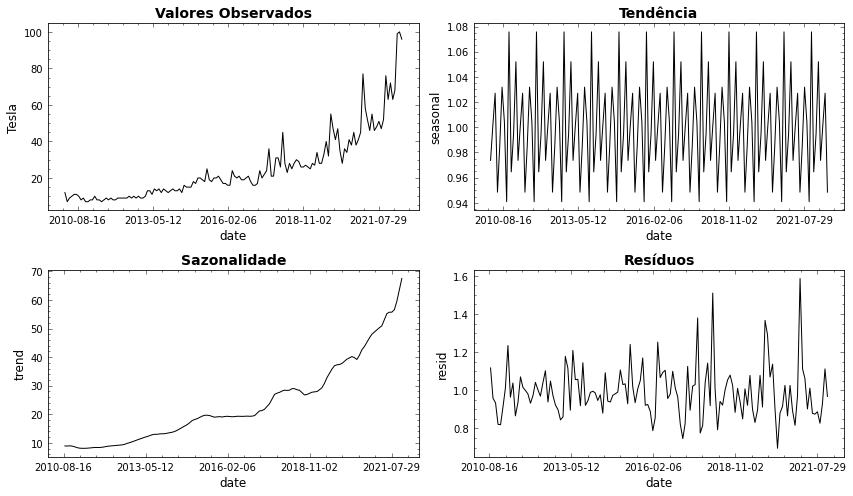

In [5]:
#@markdown `plot_decompose( )`
def plot_decompose(df, model='additive', max_lags=30):
  from statsmodels.tsa.seasonal import seasonal_decompose

  fig, ax = plt.subplots(2,2,figsize=(12,7))

  decomp = seasonal_decompose(df,model=model)

  i = 0
  sns.lineplot(x=df.index, y=df[ df.columns[0] ], ax=fig.axes[i])
  fig.axes[i].set_title('Valores Observados')
  fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

  i = 1
  sns.lineplot(x=decomp.seasonal.index, y=decomp.seasonal, ax=fig.axes[i])
  fig.axes[i].set_title('Tendência')
  fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

  i = 2
  sns.lineplot(x=decomp.trend.index, y=decomp.trend, ax=fig.axes[i])
  fig.axes[i].set_title('Sazonalidade')
  fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

  i = 3
  sns.lineplot(x=decomp.resid.index, y=decomp.resid, ax=fig.axes[i])
  fig.axes[i].set_title('Resíduos')
  fig.axes[i].xaxis.set_major_locator(ticker.MaxNLocator(5))

  plt.tight_layout()
  plt.show()

  return 

df = pd.read_csv(path + 'google_trends_tesla.csv', index_col=0,parse_dates=True)
df.drop(columns='isPartial',inplace=True)

plot_decompose(df, model='multiplicative')




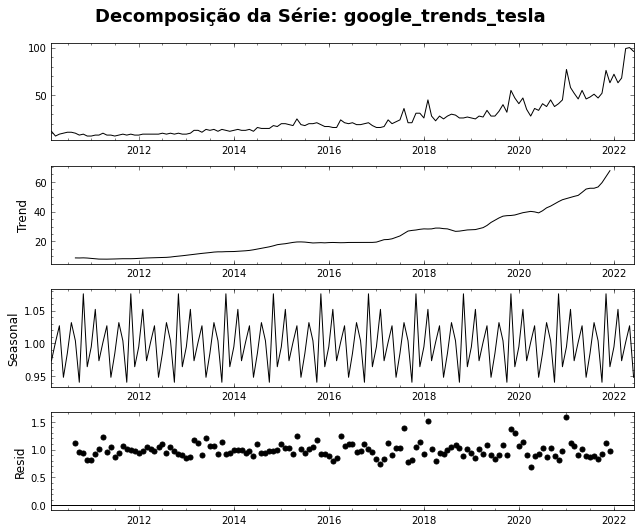

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv(path + 'google_trends_tesla.csv', index_col=0,parse_dates=True)
df.drop(columns='isPartial',inplace=True)

decomp = seasonal_decompose(df, model='multiplicative')

fig = decomp.plot()
fig.set_size_inches((9, 7))

plt.suptitle('Decomposição da Série: google_trends_tesla',y=1.05)

plt.tight_layout()
plt.show()


## Séries Temporais Aditivas e Multiplicativas

Dependendo da natureza da série as componentes de tendência, sazonalidade e resíduos podem ser combinadas de duas formas: 

$$\text{Série Aditiva} = \text{Tendência +  Sazonalidade + Resíduos}$$

$$\text{Série Multiplicativa} = \text{Tendência} \times  \text{Sazonalidade} \times \text{Resíduos}$$

Ou, seguindo a notação que empregaremos daqui em diante:

$$ Y_t = T_t + S_t + R_t $$

para modelos aditivos, e:

$$ Y_t = T_t \times S_t \times R_t $$

para modelos multiplicativos.

> **Lembre-se que estamos criando modelos e os modelos são sempre simplificações, hipóteses que fazemos, mas que serão úteis a análise e previsões das séries temporais. Ninguém informou aos usuários do Google que suas tendências e sazonalidades de buscas precisam ser somadas ou multiplicadas, e nem mesmo precisa haver uma forma de combinar essas componentes. Mas observamos que a multiplicação *funciona* e aproxima melhor a série, sendo portanto útil para nossos propósitos. Essa é a ideia de empregarmos modelos.**

# Construindo uma Série Temporal

A simulação de séries temporais tem um papel importante em muitas aplicações no campo das engenharias, da física e séries climáticas. Mas aqui o nosso propósito é mais modesto e trata-se apenas de fornecer uma ferramenta para você construir e explorar diferentes séries de dados e suas decomposições.

Uma forma comum de se pensar a componente tendência é aplicar uma função linear ou polinomial de grau maior, mas também são empregadas funções exponenciais e equações de diferenças. Já para a componente sazonal, funções periódicas como $sin$ ou $cos$, ou ainda funções *dummy* (que atribuem um valor para cada um dos perídos do ciclo), são geralmente empregadas. Assim, se você considerar um modelo aditivo,

$$ Y_t = T_t + S_t + R_t $$

E pensar, dentre outros modelos possíveis, em modelo como: 

$$ Y_t = (\beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 t^3)\space \space \space + \alpha (\frac{ 2 \pi }{ k } \sin t) \space \space \space + \text{noise} $$

onde $(\beta_0 + \beta_1 t + \beta_2 t^2 + \beta_3 t^3)$  corresponde a componente $T_t$, e empregamos $\alpha (\frac{ 2 \pi }{ k } \sin t )$ como a componente $S_t$, embora polinômios de grau maior e funções periódicas mais complexas possam ser empregadas. 

Esse modelo é implementado a seguir. Ele permite você criar séries de dados mensais, aditivas e multiplicativas, com diferentes periodicidades. O parâmetros `beta_`$n$ fornecem os coeficientes do polinômio de grau 3 e `seasons_month_len` ($k$) permite modelar o tamanho em meses do período sazonal. O parâmetro $\alpha$ fornece uma escala para a componente sazonal em termos de um percentual dos valores de tendência. O ruído é um valor aleatório com distribuição normal. 






In [197]:
#@markdown `simulate_ts1`
import ipywidgets as widgets
from statsmodels.tsa.seasonal import seasonal_decompose

def f(nr_months=60, beta_0=1, beta_1=2, beta_2=0, beta_3=0, alpha=0.2, seasons_month_len=10, noise=0.2, model='additive', show_plot=True):
  np.seed = 123
  index_dates = pd.date_range(start='1/1/2000', periods=nr_months, freq='M')

  t = np.arange(0,len(index_dates),1)
  n = len(t)

  T = beta_0 + beta_1*t + + beta_2*t**2 + beta_3*t**3
  S = np.sin( np.arange(0,len(index_dates),1) * 2 * np.pi/seasons_month_len)
  S = S # only positives values
  S = S * T.mean() * alpha # scale
  R = np.random.sample(n) 
  R = R # only positives values
  R = R * T.mean() * noise # scale

  if model == 'additive':
    Y = T + S + R  
  else:
    Y = T * S * R  
  
  Y = Y + np.abs(Y.min()) + 1 # just to create only positive values

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'] = t, Y, T, S, R 

  global ts1
  ts1 = df

  decomp = seasonal_decompose(df.Y, model=model, period=seasons_month_len)

  if show_plot:
    fig = decomp.plot()
    fig.set_size_inches((9, 7))

    plt.tight_layout()
    plt.show()

  # plt.plot(df['T'])
  # plt.show()

  # plt.plot(df['S'])
  # plt.show()

  return ts1 

simulate_ts1 = widgets.interactive(f,  alpha=(0.2,10), beta_0=(-10,10), beta_1=(-10,10), beta_2=(-10,10), beta_3=(-10,10) ,nr_months=(40,120,1), seasons_month_len=(3, 12, 3), noise=(0, 1, 0.01), model=['additive','multiplicative'])

simulate_ts1_f = f 

Como antes, você não precisa dar atenção a este código agora. Além disso sua implementação explora recursos de interatividade que podem não lhe interessar. Mas você precisa apenas executar a função `simulate_ts1` para verificar e explorar diferentes séries de dados e suas decomposições.  

In [198]:
simulate_ts1

interactive(children=(IntSlider(value=60, description='nr_months', max=120, min=40), IntSlider(value=1, descri…

A função também vai retorna um dataframe `ts1` com os valores de cada componente produzidos.

In [199]:
ts1.head()

,t,Y,T,S,R
2000-01-31,0,20.339414,1,0.000000,11.604155
2000-02-29,1,26.861881,3,7.053423,9.073199
2000-03-31,2,35.498568,5,11.412678,11.350631
2000-04-30,3,32.888525,7,11.412678,6.740588
2000-05-31,4,25.355848,9,7.053423,1.567165


Como você pode notar experimentando o programa acima ou ainda observando as séries produzidas abaixo com diferentes parâmetros, nosso modelo, embora simples, e parece ser útil para simular uma boa quantidade de diferentes séries de dados. Por isso é que empregamos modelos como esses. Mesmo simples, eles podem modelar uma grande variedade de fenômenos temporais e a maior parte dos modelos consiste em variações do modelo aqui apresentado.

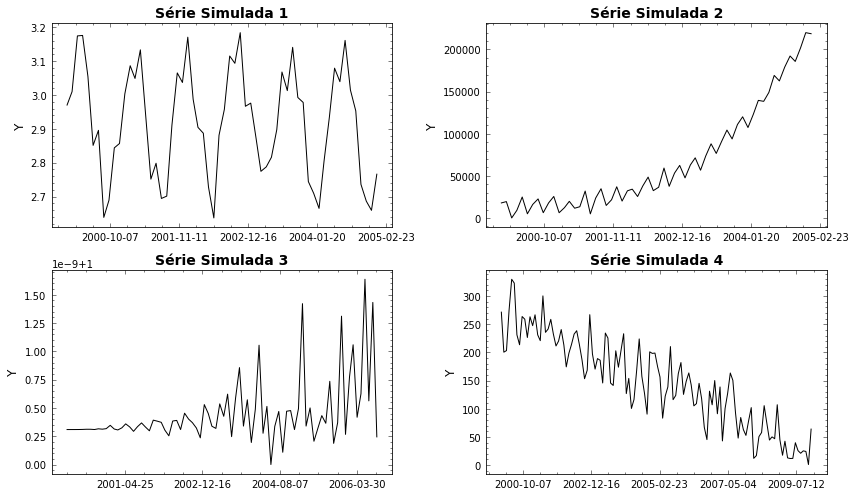

In [200]:
ts1_list = []

ts1 = simulate_ts1_f(nr_months=60, beta_1=0, seasons_month_len=10, noise=0.2, model='additive', show_plot=False)
ts1_list.append(ts1)

ts1 = simulate_ts1_f(nr_months=60, beta_1=-1, beta_2=2, beta_3=1, seasons_month_len=3, noise=0.2, model='additive', show_plot=False)
ts1_list.append(ts1)

ts1 = simulate_ts1_f(nr_months=80, beta_1=-2, alpha=0.2, seasons_month_len=1, noise=0.2, model='multiplicative', show_plot=False)
ts1_list.append(ts1)

ts1 = simulate_ts1_f(nr_months=120, beta_1=-2, seasons_month_len=6, noise=0.9, model='additive', show_plot=False)
ts1_list.append(ts1)

fig, ax = plt.subplots(2,2,figsize=(12,7))

for i, axis in enumerate(fig.axes):

  sns.lineplot(x=ts1_list[i].index, y=ts1_list[i].Y, ax=axis)
  axis.xaxis.set_major_locator(ticker.MaxNLocator(5))
  axis.set_title('Série Simulada ' + str(i+1))

plt.tight_layout()
plt.show()

# Estacionariedade  

Decompor uma série já nos traz informações bastante úteis como a expectativa de seus valores futuros e incerteza, ou seus padrões sazonais. Mas na maior parte dos casos estamos interessados em fazer previsões de valores futuros. Para isso, a maior parte dos modelos assume que a série utilizada para previsão é uma *estacionária*. 

> **Uma série estacionária é uma série cujos os valores evoluem no tempo em torno de uma média constante. O problema é que a maior parte das séries não é estacionária!**

Isso significa qeu as estatísticas, como a média, a mediana e a variância dos seus valores da série mudam significativamente ao longo. O problema é que a maior parte das séries não é estacionária pois apresenta algum tipo de tendência (ou ciclo).  





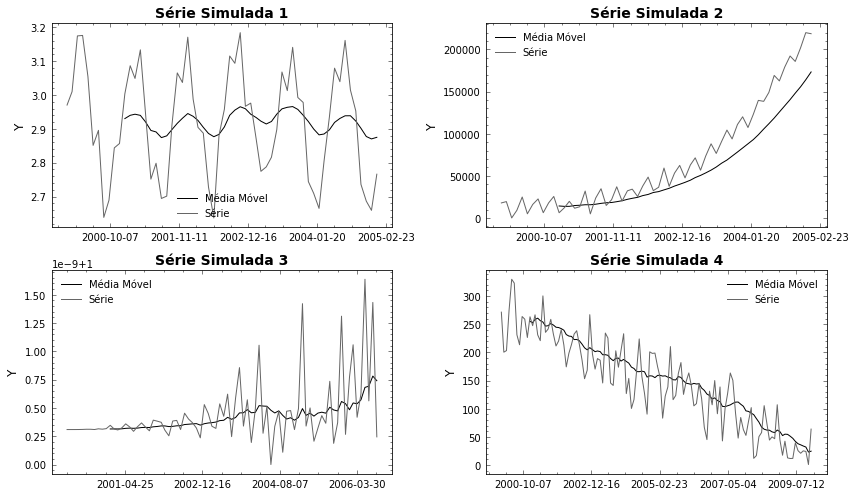

In [201]:
fig, ax = plt.subplots(2,2,figsize=(12,7))

for i, axis in enumerate(fig.axes):
  sns.lineplot(x=ts1_list[i].rolling(12).mean().index, y=ts1_list[i].rolling(12).mean().Y , ax=axis, label='Média Móvel')
  sns.lineplot(x=ts1_list[i].index, y=ts1_list[i].Y , ax=axis, label='Série')
  axis.xaxis.set_major_locator(ticker.MaxNLocator(5))
  axis.set_title('Série Simulada ' + str(i+1))

plt.tight_layout()
plt.show()

Por exemplo, das séries anteriores, apenas a Série Simulada 1 apresenta uma média dos valores a intervalos de 12 meses (*média móvel*) dentro de um intervalo pequeno de $[1.0, 1.14]$. De fato, você pode observar que essa é a única série produzida com a componente tendência igual a uma constante. Todas as demais apresentam a médias móveis de 12 meses com valores crescentes ou decrescentes.  E se você ainda tiver dúvidas sobre a Série Simulada 3, pode observar também o desvio padrão ao longo do tempo das séries ao longo do tempo. Aqui empregamos valores normalizados (normalizados entre $[0,1]$) do desvio padrão. 

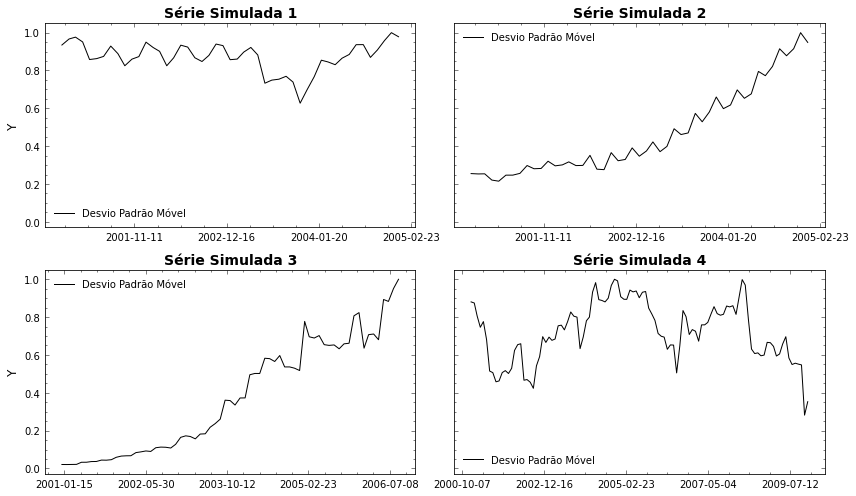

In [205]:
fig, ax = plt.subplots(2,2,figsize=(12,7), sharey=True)

for i, axis in enumerate(fig.axes):

  sns.lineplot(x=ts1_list[i].rolling(12).std().index, y=ts1_list[i].rolling(12).std().Y / ts1_list[i].rolling(12).std().Y.max() , ax=axis, label='Desvio Padrão Móvel')
  axis.xaxis.set_major_locator(ticker.MaxNLocator(5))
  axis.set_title('Série Simulada ' + str(i+1))

plt.tight_layout()
plt.show()

Das séries do começo do nosso capítulo somente a série pharma_sales parece suficientemente estacionária. 

Assim, o procedimento geral consiste em fazermos *transformações* na série original (não estacionária) para obtermos uma série estacionária *derivada* a qual poderemos empregar para previsões e, então, voltarmos à série original. Em geral nos referimos a esse procedimento como *tornar a série estacionária*, embora, é claro, trata-se de criar um nova série derivada. Nesse procedimento a a decomposição de séries tem um papel fundamental. 



# Tendências e Transformações

Duas transformações são particularmente úteis e geralmente empregadas para tirar tendências das séries tornando-as estacionárias: aplicar diferenças e o $log$ dos valores da série. Mas vamos entender como e por que funcionam essas transformações. 



### Série de Diferenças

Uma série de diferenças consiste em criarmos a série de diferenças dos valores da série original. Por exemplo, para série:

$$ Y_t = [0, 2, 4, 6, 8, 10] $$ 

a série de diferenças de primeira ordem consiste em:

$$ \Delta Y_t = Y_t - Y_{t-1} = [na, 2, 2, 2, 2, 2] $$

Para a série 

$$ Y_t = [0, 2, 4, 8, 16, 32, ..., 2^n] $$ 

a série de diferenças de primeira ordem consiste em:

$$ \Delta Y_t = Y_t - Y_{t-1} = = [na, 0, 2, 4, 8, 16,  ..., 2^{n-1}] $$

e a segunda ordem consiste de fazermos novamente as diferenças da série resultante:

$$ \Delta^2 Y_t = \Delta Y_t - \Delta Y_{t-1} = [na, na, 0, 2, 4, 8,  ..., 2^{n-2}] $$

Em `Python` você pode empregar a função `diff()` do `Pandas` obter Séries de diferenças. Você pode apenas ver os resultados, voltaremos nisso mais adiante.

In [213]:
df = pd.DataFrame()
df['Y'] = np.array([2**x for x in range(6)])
df['Y_diff'] = df['Y'].diff()
df['Y_2diff'] = df['Y'].diff().diff()
df

,Y,Y_diff,Y_2diff
0,1,NaN,NaN
1,2,1.0,NaN
2,4,2.0,1.0
3,8,4.0,2.0
4,16,8.0,4.0
5,32,16.0,8.0


In [218]:
df = pd.DataFrame()
df['Y'] = np.arange(0,12,2)
df['Y_diff'] = df['Y'].diff()
df['Y_2diff'] = df['Y'].diff().diff()
df

,Y,Y_diff,Y_2diff
0,0,NaN,NaN
1,2,2.0,NaN
2,4,2.0,0.0
3,6,2.0,0.0
4,8,2.0,0.0
5,10,2.0,0.0


O que você pode notar é que podemos empregar essas diferenças para tornar uma série estacionária. Considere por exemplo uma série composta apenas de uma tendência linear:

$$ Y_t = \beta_0 + \beta_1 t $$

Ela não é certamente uma série estacionária pois sua média muda ao longo do tempo em uma taxa $\beta_1$. Agora, se tomamos a série de diferenças de $Y_t$:

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta_0 + \beta_1 t) -  (\beta_0 + \beta_1 (t-1)) $$
$$ = \beta_1 $$

e, portanto, a série obtida é estacionária. 

Se tomamos agora a série de diferenças de $Y_t$:

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta_0 + \beta_1 t) -  (\beta_0 + \beta_1 (t-1)) $$
$$ = \beta_1 $$

Assim, se tomamos a série $\Delta Y_t$: 

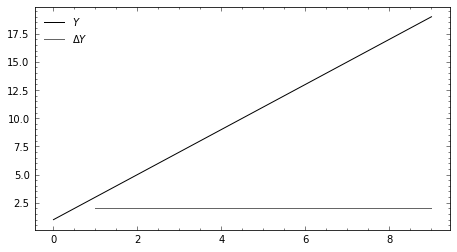

,t,Y,Y_diff
0,0,1,NaN
1,1,3,2.0
2,2,5,2.0
3,3,7,2.0
4,4,9,2.0
5,5,11,2.0
6,6,13,2.0
7,7,15,2.0
8,8,17,2.0
9,9,19,2.0


In [244]:
df = pd.DataFrame()
beta_0, beta_1 = 1, 2
df['t'] = np.arange(0,10,1)
df['Y'] = beta_0 + beta_1*df['t']
df['Y_diff'] = df['Y'].diff()

plt.plot(df['Y'],label='$Y$')
plt.plot(df['Y_diff'],label='$\\Delta Y$')
plt.legend()
plt.show()

df

O mesmo vale para polinômios de ordem superior empregando-se diferenças de ordem maior. Se tomarmos a série:

$$ Y_t =  \beta_0 + \beta_1 t + \beta_2 t^2 $$

Podemos empregar uma série de diferenças de ordem 2:

$$ \Delta Y_t = Y_t -  Y_{t-1} $$
$$ = (\beta_0 + \beta_1 t +  \beta_2 t^2) -  (\beta_0 + \beta_1 (t-1)  + \beta_2 (t-1)^2) $$
$$ = \beta_1 - \beta_2 + 2 \beta_2 t $$

Como $\Delta Y_t$ é linear, sabemos que aplicando novamente a essa série de diferenças obteremos uma série de valor constante $\beta'$: 

$$ \Delta^2 Y_t = \Delta Y_t -  \Delta Y_{t-1} $$
$$ = \beta' $$


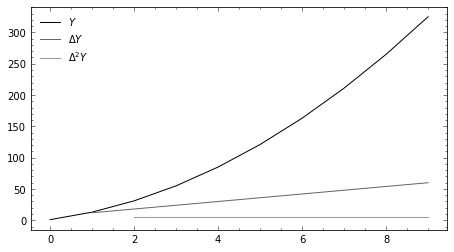

,t,Y,Y_diff,Y_2diff
0,0,1,NaN,NaN
1,1,13,12.0,NaN
2,2,31,18.0,6.0
3,3,55,24.0,6.0
4,4,85,30.0,6.0
5,5,121,36.0,6.0
6,6,163,42.0,6.0
7,7,211,48.0,6.0
8,8,265,54.0,6.0
9,9,325,60.0,6.0


In [243]:
df = pd.DataFrame()
beta_0, beta_1, beta_2 = 1, 9, 3
df['t'] = np.arange(0,10,1)
df['Y'] = beta_0 + beta_1*df['t'] + beta_2*df['t']**2
df['Y_diff'] = df['Y'].diff()
df['Y_2diff'] = df['Y'].diff().diff()

plt.plot(df['Y'],label='$Y$')
plt.plot(df['Y_diff'],label='$\\Delta Y$')
plt.plot(df['Y_2diff'],label='$\\Delta^2Y$')
plt.legend()
plt.show()

df

Felizmente para a maior parte dos casos práticos, mesmo séries complexas como séries financeiras e econômicas, a aplicação de uma ou duas ordens de diferenças é suficiente para você obter a estacionariedade da série.



## Série do Logaritmo

Uma série de diferenças elimina uma tendência linear para séries aditivas e exponencial para séries multiplicativas, e séries de diferenças de ordem maior podem ser utilizadas para séries com tendência polinomial. Mas o que dizer das séries exponenciais como a maior parte das séries econômicas e de preços. Para isso podemos empregar a transformação logarítma da série antes de aplicarmos a diferenças.



Note que, se $Y_t$ tem apenas tendência exponencial ela é uma série da forma:

$$ Y_t = \beta_0 + \beta_1 ^ {t} $$

e portanto, 

$$ \ln Y_t = \ln \beta_0 ln \beta_1 ^ {t} $$
$$=\ln \beta_0 ln \beta_1  \times {t} = \beta_0' \times t $$

sendo a série $\ln Y_t$ linear ela pode ser tornada estacionária aplicando-se uma única transformação de diferenças.

$$ \Delta \ln Y_t = \beta_0' \times t $$

É por isso que no tratamento de várias séries econômicas e de preços aplicamos frequentemente a transformação logarítmica, o que se aplica não só para obtermos a estacionariedade de séries temporais mas também a outros problemas, como a aplicação de modelos de regressão linear. 

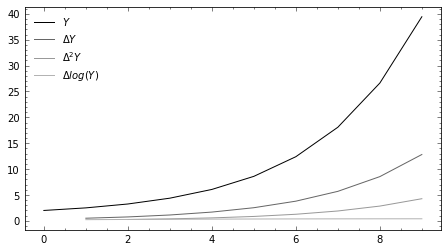

,t,Y,Y_diff,Y_2diff,Y_log_diff
0,0,2.000000,NaN,NaN,NaN
1,1,2.500000,0.500000,NaN,0.223144
2,2,3.250000,0.750000,0.250000,0.262364
3,3,4.375000,1.125000,0.375000,0.297252
4,4,6.062500,1.687500,0.562500,0.326216
5,5,8.593750,2.531250,0.843750,0.348913
6,6,12.390625,3.796875,1.265625,0.365905
7,7,18.085938,5.695312,1.898438,0.378195
8,8,26.628906,8.542969,2.847656,0.386863
9,9,39.443359,12.814453,4.271484,0.392868


In [247]:
df = pd.DataFrame()
beta_0, beta_1 = 1, 1.5
df['t'] = np.arange(0,10,1)
df['Y'] = beta_0 + beta_1**df['t']  
df['Y_diff'] = df['Y'].diff()
df['Y_2diff'] = df['Y'].diff().diff()
df['Y_log_diff'] = np.log( df['Y'] ).diff()

plt.plot(df['Y'],label='$Y$')
plt.plot(df['Y_diff'],label='$\\Delta Y$')
plt.plot(df['Y_2diff'],label='$\\Delta^2Y$')
plt.plot(df['Y_log_diff'],label='$\\Delta log(Y)$')
plt.legend()
plt.show()

df

O gráfico acima mostra a limitação de empregarmos séries de diferenças para tornar uma série exponencial estacionária. Entretanto, a série se torna facilmente estacionária se empregarmos a diferença ao log dos valores.

,t,Y,T,S,R,I
2018-01-31,0,4.52,1,2.53,0.99,0.0
2018-02-28,1,4.87,3,2.93,-1.07,0.0
2018-03-31,2,5.57,5,1.93,-1.36,0.0
2018-04-30,3,7.79,7,0.53,0.26,0.0
2018-05-31,4,7.43,9,-2.67,1.10,0.0


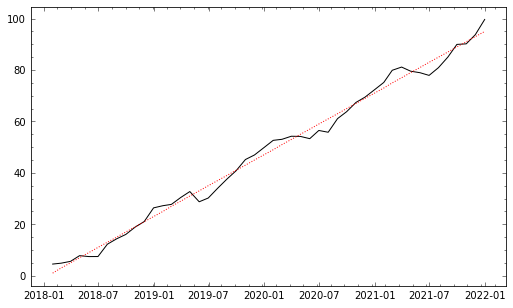

In [7]:
def ts_generate(start = '1/1/2018', 
                end = '1/2/2022',
                freq = 'M',
                seed = 123,
                beta = np.array([1 , 2]),
                alpha = np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3]), 
                r_scale = 5,
                I_scale = 0, # was 5
                additive = True,
                verbose = False):

  np.random.seed(seed)

  index_dates = pd.date_range(start=start, end=end, freq=freq)
  t = np.arange(0,len(index_dates),1)
  n = len(t)

  m = len(beta)

  B = ( t**0 ).reshape([len(t),1])
  for i in range(1,m):
    B = np.append(B,( t**i ).reshape(len(t),1), axis=1 )
 
  alpha = alpha - np.abs( alpha.mean() )

  period = len(alpha)
  A = np.zeros([n,period])

  for i in range(n):
    A[i,i%period] = 1

  r = np.random.rand(n).T * r_scale
  r = r - np.abs( r.mean() )

  T = B @ beta
  S = A @ alpha
  R = r
  I = np.ones(n).T  * I_scale

  if additive:
    Y = T + S + R + I
  else:
    Y = T * S * R * I

  df = pd.DataFrame()
  df.index = index_dates
  df['t'], df['Y'], df['T'], df['S'], df['R'], df['I'] = t, Y, T, S, R, I  

  if verbose:
    # np.set_printoptions(precision=2)
    pd.set_option('display.precision', 2)

    display( df.head() )

    # np.set_printoptions(precision=8)
    pd.set_option('display.precision', 6)

  return df

df = ts_generate(verbose=True)

plt.figure(figsize=(8,5))
    
plt.plot( df.Y )
plt.plot( df['T'] + df.I , 'r:' )
plt.show()


In [8]:
index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
values = np.sin( np.arange(0,len(index_dates),1) * np.pi/4 )  
df = pd.DataFrame()
df.index = index_dates 
df['values'] = values

plot_series(df['values'])  

NameError: ignored

In [ ]:
import ipywidgets as widgets

def f(P=20):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  
  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  plot_series(df['values'])  

w = widgets.interactive(f, P=(1, 100, 1))
display(w)



In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  
  values = values + noise*np.random.sample(len(index_dates))
  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  plot_series(df['values'])  

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01))
display(w)

# Séries não Estacionárias

Uma série não estacionária é uma série que tem suas estatísticas alteradas ao longo do tempo.

> **Uma série não estacionária é uma série que tem suas estatísticas alteradas ao longo do tempo. Por exemplo, a média e a variância, e assim também o desvio padrão, mudam significativamente ao longo do tempo.**

Isso é um grande um problema para as predições e uma forma de contornarmos isso é fazendo transformações das séries temporais tornando-as estacionárias. São comuns transformações do tipo $log(x_t)$ ou de potências $x_t^2$, mas antes disso vamos ver um teste para verificar se a uma série é, de fato, signficativamente estacionária ou não. 



In [ ]:
trend_and_season = pd.read_csv('https://github.com/Rogerio-mack/Ciencia-de-Dados-e-Aprendizado-de-Maquina/raw/main/data/AirPassengers.csv', parse_dates=['date'], index_col='date')

In [ ]:
def plot_var(df,ax,t):
  ix = np.linspace(0,len(df),5).astype(int)
  ax.bar(range(4), np.array([df.reset_index().iloc[ ix[0]:ix[1] ].value.var(),
                              df.reset_index().iloc[ ix[1]:ix[2] ].value.var(),
                              df.reset_index().iloc[ ix[2]:ix[3] ].value.var(),
                              df.reset_index().iloc[ ix[3]:ix[4] ].value.var()]))
  ax.set_title('Quarter Variances ')

  return
  
fig, ax = plt.subplots(1,3, figsize=(20,4))

trend_and_season.plot(title='Trend e Season Only', legend=False, ax=ax[0])
plot_means(trend_and_season, ax=ax[1],t='Trend and Season')
plot_var(trend_and_season, ax=ax[2],t='Trend and Season')

plt.tight_layout()
plt.show()


plt.show()

A Série de Passageiros Não é claramente estacionária e podemos ver a variação tanto da média como da variância ao longo do tempo.

# ADF Augmented Dickey-Fuller 

O teste **ADF Augmented Dickey-Fuller** é um teste para verificar se uma série temporal é ou não estacionária de modo significativo. É um dos testes mais simples e você pode buscar outros testes mais elaborados se precisar aplicá-los de fato. Na prática, todos esses testes são limitados a poucas características de não estacionariadade, e pode ser necessário aplicar mais de um teste e, mesmo, uma inspeção visual pode ser às vezes mais importante e reveladora.

Aqui a hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (tem alguma estrutura dependente do tempo). A hipótese alternativa (rejeitando a hipótese nula) é que a série temporal é estacionária.

Assim, de modo prático,

$p-valor \gt 0,05$ : Falha ao rejeitar a hipótese nula ($H0$), **a série não é estacionária**.

$p-value \le 0.05$ : Rejeitar a hipótese nula ($H0$), **a série é estacionária**.

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5,trend=4):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  +  np.cos( np.arange(0,len(index_dates),1) * np.pi/(2*P) ) + 2
  values = values * noise*np.random.sample(len(index_dates))
  values = values * trend*np.linspace(0,1,len(index_dates)) + 1
  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  plot_series(df['values'])  

  return df

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01), trend=(0,20,0.1))
display(w)

w.result

In [ ]:
from statsmodels.tsa.stattools import adfuller

df = w.result

X = df['values']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Ou, se preferir uma versão mais simplificada, 

In [ ]:
def isSeriesStationary(series):
  pValue = adfuller(series)[1]
  if pValue > 0.05:
      return False
  else:
      return True

isSeriesStationary(df['values'])  

# Tornando uma Série Estacionária 

Várias transformações podem ser aplicadas para tornar uma série estacionária. A ideia é aplicar a transformação, empregar a série estacionária para a criar um modelo de predição e, feita a predição, aplicar a inversa da transformação para obter o resultado da série original.

Vários tipos de transformação podem ser aplicadas o que vai depender da série de dados e não há uma regra para isso. Mas são comuns a aplicação de $log(x_t)$, funções de potência como $x_t^{exp}$, ou ainda funções de diferença, como abaixo, que podem remover tendências e sazonalidades dos dados.





<img src="https://github.com/Rogerio-mack/Temporal/raw/main/Figures/TimeSeriesFlows/TimeSeriesFlows.png" width=800, align="center"> 

<br>

<small> **No emprego de vários modelos, estatísticos ou não, é comum trasformarmos a série em estacionária para aplicação dos modelos e previsões.**

Veja, por exemplo, como a aplicação do `log()` *estabiliza* o desvio padrão de variância da série original. 

In [ ]:
trend_and_season_log = np.log(trend_and_season) 

plt.subplot(1,2,1)
plt.plot(trend_and_season, label='Série')
plt.plot(trend_and_season.rolling(window = 12).std(), color='r', label='mean(std)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(trend_and_season_log, label='Log Série')
plt.plot(trend_and_season_log.rolling(window = 12).std(), color='r', label='mean(std)')
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(1,2,1)
plt.plot(trend_and_season.rolling(window = 12).var(), color='r', label='mean(var)')
plt.legend()

plt.subplot(1,2,2)
plt.plot(trend_and_season_log.rolling(window = 12).var(), color='r', label='mean(var)')
plt.legend()

plt.tight_layout()
plt.show()

## Transformação de diferença
A diferenciação é um método de transformar um conjunto de dados de série temporal que pode tanto remover tendências e sazonalidades dos dados.

A ideia transformarmos a série de dados em uma série de diferenças em um dado intervalo para obtermos a série estacionária $y_e$.

$$ y_e(t) = y(t) - y(t- \text{intervalo}) $$

Vamos criar uma nova série $y_e$ baseada na série original $y$ considerando o intervalo $1$ do seguinte modo:

$$ y_e(t) = y(t) - y(t-1) $$

In [ ]:
import ipywidgets as widgets

def f(P=20,noise=0.5,trend=0.2):
  index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
  values = np.sin( np.arange(0,len(index_dates),1) * np.pi/P )  +  np.cos( np.arange(0,len(index_dates),1) * np.pi/(2*P) ) + 10
  values = values + noise*np.random.sample(len(index_dates))
  values = values * trend*np.linspace(0,1,len(index_dates)) + 1

  values = values

  df = pd.DataFrame()
  df.index = index_dates 
  df['values'] = values

  df = df.diff().dropna() 
  plot_series(df['values'])  

  return df

w = widgets.interactive(f, P=(1, 100, 1), noise=(0, 1, 0.01), trend=(0,20,0.1))
display(w)

w.result

In [ ]:
from statsmodels.tsa.stattools import adfuller

df = w.result

X = df['values']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Agora os dados se mostram, tanto graficamente como pelo teste ADF, estacionários.

# Caso: **Estimando a emissão de CO2 no Mundo** 

Vamos empregar o teste para verificar a não estacionariedade na série de emissões de CO2.

Dados: http://meusite.mackenzie.br/rogerio/data_load/co2.csv

In [ ]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/co2.csv')

df.index = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df.drop(columns='Date',inplace=True)
df.head()

In [ ]:
plot_series(df['CO2'])

In [ ]:
from statsmodels.tsa.stattools import adfuller

X = df['CO2']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
isSeriesStationary(df['CO2'])  

# Tornando a Série Estacionária 

Vamos criar uma nova série $y_e$ baseada na série original $y$ do seguinte modo:

$$ y_e(t) = y(t) - y(t-1) $$



In [ ]:
from statsmodels.tsa.stattools import adfuller

X = df['CO2'].diff().dropna()
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

In [ ]:
isSeriesStationary(df['CO2'].diff().dropna())  

In [ ]:
plot_series(df['CO2'].diff().dropna())

# Random Walk: Valores Aleatórios

Um caso especial de Série Temporal que você pode encontrar é quando a Série não apresenta de fato uma dependendência temporal mas é constituída de valores aleatórios. Embora apareçam diferentes valores no tempo eles não tem correlação com valores anteriores ou mesmo com o período. Séries como essa apresentam um gráfico de Auto Correlação e Auto Correlação Parcial muito característicos e para esse tipo de Série modelos estatísticos sofisticados (do AR, MA, ARIMA ou mais) e mesmo modelos de aprendizado de máquina podem fazer pouco, sendo preferível o uso de modelos bastante simples de médias.

In [ ]:
index_dates = pd.date_range(start='1/1/2000', end='1/1/2022', freq='M')
values = np.random.sample( len(index_dates) )  
random_walk = pd.DataFrame()
random_walk.index = index_dates 
random_walk['values'] = values

plot_series(random_walk['values'])  

yt = St + Tt + Rt

where yt = data at period t

Tt = trend-cycle component at period t

St = seasonal component at period t

Rt = remainder component at period t




A tendência representa o comportamento da série no longo prazo, o aumento ou diminuição de longo prazo nos dados o que pode se dar de forma linear ou não. 


Geralmente combina-se a tendência e o *ciclo* em um único componente de ciclo de tendência (às vezes chamado de tendência por simplicidade). Assim, pensamos em uma série temporal como compreendendo três componentes: um componente de ciclo de tendência, um componente sazonal e um componente restante (contendo qualquer outra coisa na série temporal).



O componente de sazonalidade representa o padrão sazonal na série. Os ciclos ocorrem repetidamente ao longo de um
período de tempo.
Os resíduos representam o comportamento que não pode ser explicado pelos componentes de tendência e sazonalidade. Elas
correspondem a erros aleatórios, também chamados de ruído branco.


Padrões de séries temporais: tendência, sazonal e cíclico
Tendência :
Existe uma  Não precisa ser linear. Às vezes, nos referimos a uma tendência como “mudança de direção”, quando ela pode passar de uma tendência crescente para uma tendência decrescente.

Sazonal :
Um padrão sazonal ocorre quando uma série temporal é afetada por fatores sazonais, como a época do ano ou o dia da semana. A sazonalidade é sempre de um período fixo e conhecido (dentro de uma estação, um ano, etc.).

Cíclico :
Um ciclo ocorre quando os dados apresentam subidas e descidas que não são de frequência fixa . Essas flutuações geralmente são devidas a condições econômicas e muitas vezes estão relacionadas ao “ciclo de negócios”. A duração dessas flutuações é geralmente de pelo menos 2 anos.

Muitas pessoas confundem comportamento cíclico com comportamento sazonal, mas na verdade são bem diferentes. Se as flutuações não são de frequência fixa, então elas são cíclicas; se a frequência é imutável e associada a algum aspecto do calendário, então o padrão é sazonal. Em geral, a duração média dos ciclos é maior do que a duração de um padrão sazonal, e as magnitudes dos ciclos tendem a ser mais variáveis ​​do que as magnitudes dos padrões sazonais.

2.4Parcelas sazonais
Um gráfico sazonal é semelhante a um gráfico de tempo, exceto que os dados são plotados em relação às “estações” individuais nas quais os dados foram observados. Um gráfico sazonal permite que o padrão sazonal subjacente seja visto com mais clareza e é especialmente útil na identificação de anos em que o padrão muda.

2.7.1Autocorrelação
Assim como a correlação mede a extensão de uma relação linear entre duas variáveis, a autocorrelação mede a relação linear entre os valores defasados ​​de uma série temporal.

Existem vários coeficientes de autocorrelação, correspondentes a cada painel no gráfico de defasagem. Por exemplo, 
r
1
 mede a relação entre 

 mede a relação entre 
 e assim por diante.

O coeficiente de correlação da amostra (pearson) é definido como:
dado 

 obtemos o coeficiente de autocorrelação:
Os coeficientes de autocorrelação compõem a função de autocorrelação ou ACF .

1.1.1 Differencing
Transformations such as logarithms can help to stabilise the variance of a time series. Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.

For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly. Also, for non-stationary data, the value of r1 is often large and positive.

p1 <- google_2015 %>% 
  ACF(Close) %>% 
  autoplot()
p2 <- google_2015 %>% 
  ACF(difference(Close)) %>% 
  autoplot()

In [ ]:
#@markdown imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import statsmodels.formula.api as sm

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
# from statsmodels.tsa.stattools import periodogram


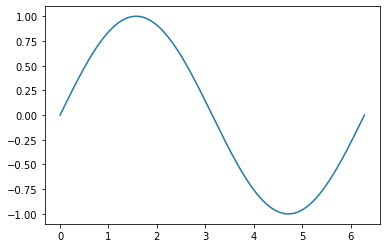

In [ ]:
plt.plot( np.linspace(0,2 * np.pi, 1000) , np.sin( np.linspace(0,2 * np.pi, 1000) ) )

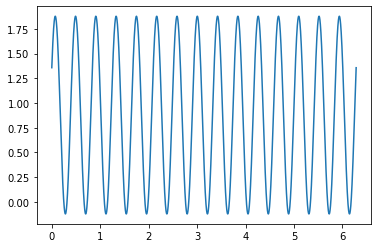

In [ ]:
sin_phase = 1
cos_phase = 1
sin_scale = 1 
cos_scale = 1
sin_f =  15
cos_f =  0
T = 12

v = np.sin( sin_f * np.linspace(0,2 * np.pi, T*1000) + sin_phase/2 ) + np.cos(  cos_f * np.linspace(0,2 * np.pi, T*1000) + cos_phase/2 )
plt.plot(np.linspace(0,2 * np.pi, T*1000), v)
plt.show()




In [ ]:
len(v)

12000

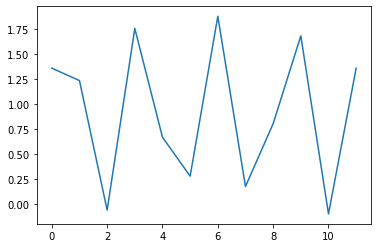

In [ ]:
plt.plot( np.arange(0,12), v[ np.linspace(0,len(v)-1,T).astype(int) ] )

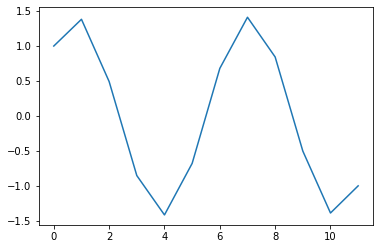

In [ ]:
sin_phase = 0
cos_phase = 0
sin_scale = 1
cos_scale = 1
sin_T =  2 * np.pi
cos_T =  2 * np.pi
T = 12



St_sin_cos = sin_scale * np.sin(  2 * np.pi / sin_T * np.arange(0,T,1) + sin_phase/2 ) + cos_scale * np.cos( 2 * np.pi / cos_T * np.arange(0,T,1) + cos_phase/2 ) 

plt.plot(St_sin_cos)
plt.show()

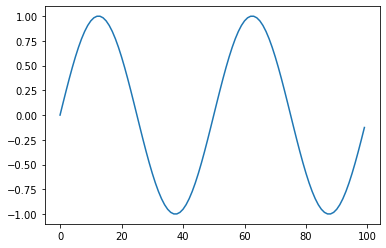

In [ ]:
plt.plot( np.sin( 2 * np.pi / 50 * np.arange(0,100,1) ) )

In [ ]:
#@markdown **plot_series()** Decomposição de Séries Temporais + ACF + PACF
def plot_series(values, decomp_type='additive', max_lags=30):
  #
  # values = a pandas series with datetime index
  #
  import warnings
  warnings.filterwarnings('ignore')

  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  %matplotlib inline 
  import seaborn as sns
  import statsmodels.formula.api as sm

  from statsmodels.graphics.tsaplots import plot_acf
  from statsmodels.graphics.tsaplots import plot_pacf
  from statsmodels.tsa.stattools import adfuller
  from statsmodels.tsa.seasonal import seasonal_decompose
  # from statsmodels.tsa.stattools import periodogram

  from pylab import rcParams
  rcParams['figure.figsize'] = 17,3

  plt.plot(values.index, values, c='r')
  plt.title('Original | Observed Series')
  plt.show()

  rcParams['figure.figsize'] = 14,3
  fig, ax = plt.subplots(nrows=1, ncols=3, sharey=True)

  decomposition = seasonal_decompose(values, model=decomp_type)

  ax[0].plot(decomposition.trend)
  ax[0].plot(decomposition.trend.index, Tt,'r:')
  ax[0].set_title('Trend')
  ax[1].plot(decomposition.seasonal)
  ax[1].plot(decomposition.seasonal.index, St,'r:')
  ax[1].set_title('Seasonal')
  ax[2].plot(decomposition.resid)
  ax[2].plot(decomposition.resid.index, Rt,'r:')
  ax[2].set_title('Residuals')

  plt.tight_layout()
  plt.show()

#  rcParams['figure.figsize'] = 14,3
#  fig, ax = plt.subplots(nrows=1, ncols=3)

#  plot_acf(values, ax=ax[0], lags = max_lags)
#  plot_pacf(values, ax=ax[1], lags = max_lags)


  # periods = periodogram(values)
  # # print(periods)
  # ax[2].bar(x=range(len(periods)), height=periods)
  # plt.title('Periodogram')

#  plt.tight_layout()
#  plt.show()

  warnings.filterwarnings('once')

  return 




In [ ]:
np.array([1,2,3]) * np.array([1,2,4])

array([ 1,  4, 12])

In [ ]:
from sympy import *

In [ ]:
from sympy import symbols
x, y = symbols('x y')
expr = x + 2*y


In [ ]:
expr.evalf(subs={x:1, y:3})

7.00000000000000

In [ ]:
np.ones([3,1])

array([[1.],
       [1.],
       [1.]])

In [ ]:
np.array([ [ 1, 0 ,0], [0, 1, 0], [0, 0 , 1], [ -1, -1, -1], [ -1, -1, -1], [ -1, -1, -1]]) @ np.array([1, -1, 0]).T

array([ 1, -1,  0,  0,  0,  0])

In [ ]:
np.random.seed(123)
start='1/1/2018'
end='1/2/2022' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(0,len(index_dates),1)

n = len(t)
m = 1

C = np.arange(1,n+1).reshape([n,1])

for i in range(m):
  C = np.append( C , C[:,i].reshape([n,1])**i, axis=1 )

Matrix(C)  

b = np.array( [ 1 , 2 ])

Matrix(b)

T = 12
D = np.zeros([n,T])

for i in range(n):
  D[i,i%T] = 1

# Matrix(D) 

a_before = np.array([28.6, 29.0, 28.0, 26.6, 23.4,	22.9,	22.9,	24.5,	25.2,	26.5,	26.9,	28.3])

a = a_before - np.abs( a_before.mean() )
Matrix(a)

R = np.random.rand(n).T * 2

# Matrix(R)

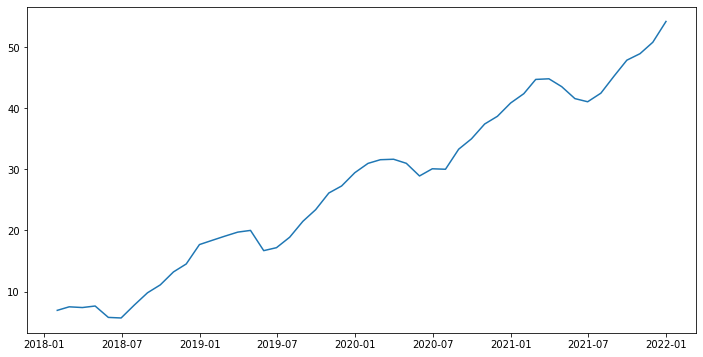

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( index_dates,  C @ b + D @ a + R )
plt.show()

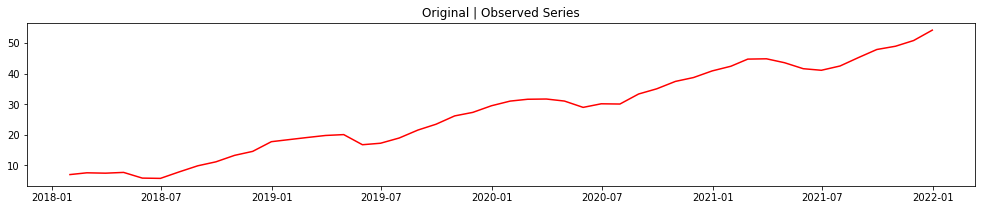

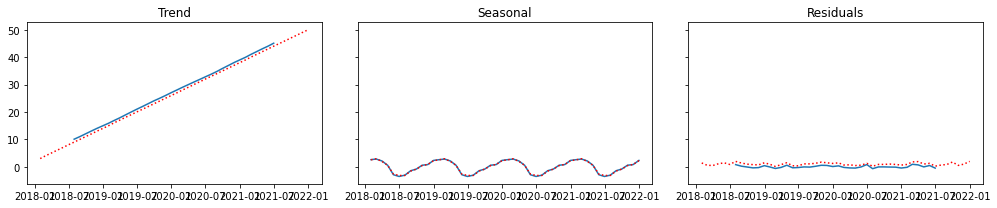

In [ ]:
df = pd.DataFrame()
df.index = index_dates
X = C @ b + D @ a + R 
df['values'] = X


Rt = R
Tt = C @ b 
St = D @ a  

plot_series(df['values'])  

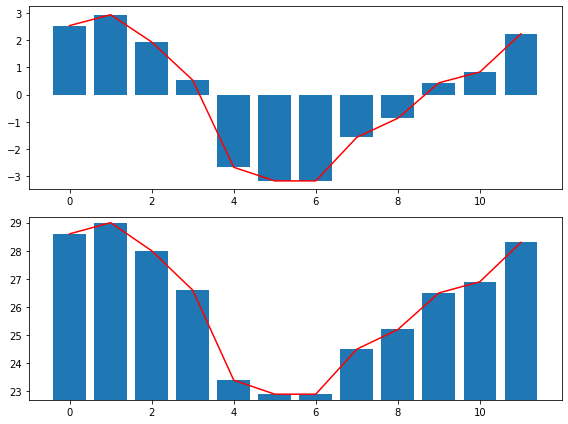

In [ ]:
plt.figure(figsize=(8,6))
    
plt.subplot(2,1,1)
plt.bar(x=np.arange(0,len(a)),height=a)
plt.plot(a,color='r')

plt.subplot(2,1,2)
plt.bar(x=np.arange(0,len(a_before)),height=a_before)
plt.plot(a_before,color='r')
plt.ylim([a_before.max() - (a.max() - a.min()) - 0.2, a_before.max() + 0.2 ])

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,values
2018-01-31,6.926272
2018-02-28,7.505612
2018-03-31,7.387036
2018-04-30,7.635963
2018-05-31,5.772271


In [ ]:
df['R'] = Rt  
df['T'] = Tt 
df['S'] = St  
df['t'] = np.arange(0,len(df))

df.head()

,values,R,T,S,t
2018-01-31,6.926272,1.392938,3,2.533333,0
2018-02-28,7.505612,0.572279,4,2.933333,1
2018-03-31,7.387036,0.453703,5,1.933333,2
2018-04-30,7.635963,1.102630,6,0.533333,3
2018-05-31,5.772271,1.438938,7,-2.666667,4


In [ ]:
import statsmodels.formula.api as sm

model = sm.ols(formula='values ~ t', data=df)
model = model.fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 values   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1715.
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           4.62e-38
Time:                        14:06:56   Log-Likelihood:                -107.10
No. Observations:                  48   AIC:                             218.2
Df Residuals:                      46   BIC:                             221.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1614      0.654      6.361      0.0

In [ ]:
df['pred-T'] = model.predict(df.t)

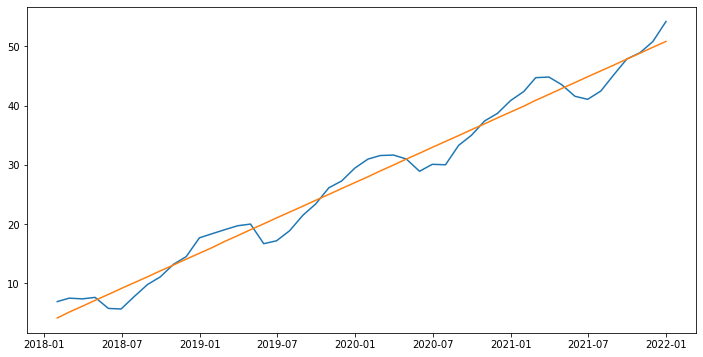

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, model.predict(df.t) )
plt.show()

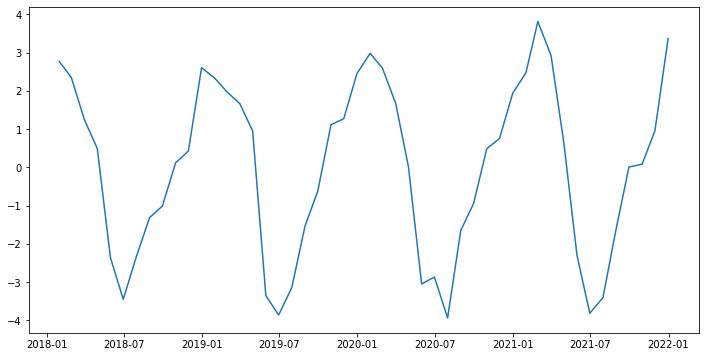

In [ ]:
df['values-pred-T'] = df['values'] - model.predict(df.t)

plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values-pred-T'] )
plt.show()

In [ ]:
df['month'] = df.index.month
df['year'] = df.index.year

df['quarter'] = df.index.quarter

df['semester'] = 1 + (df.index.month > 6)

In [ ]:
df

,values,R,T,S,t,pred-T,values-pred-T,month,year,quarter,semester
2018-01-31,6.926272,1.392938,3,2.533333,0,4.161420,2.764851,1,2018,1,1
2018-02-28,7.505612,0.572279,4,2.933333,1,5.154481,2.351131,2,2018,1,1
2018-03-31,7.387036,0.453703,5,1.933333,2,6.147542,1.239494,3,2018,1,1
2018-04-30,7.635963,1.102630,6,0.533333,3,7.140603,0.495359,4,2018,2,1
2018-05-31,5.772271,1.438938,7,-2.666667,4,8.133664,-2.361393,5,2018,2,1
2018-06-30,5.679546,0.846213,8,-3.166667,5,9.126725,-3.447179,6,2018,2,1
2018-07-31,7.794862,1.961528,9,-3.166667,6,10.119787,-2.324925,7,2018,3,2
2018-08-31,9.802993,1.369659,10,-1.566667,7,11.112848,-1.309855,8,2018,3,2
2018-09-30,11.095197,0.961864,11,-0.866667,8,12.105909,-1.010711,9,2018,3,2
2018-10-31,13.217568,0.784235,12,0.433333,9,13.098970,0.118599,10,2018,4,2


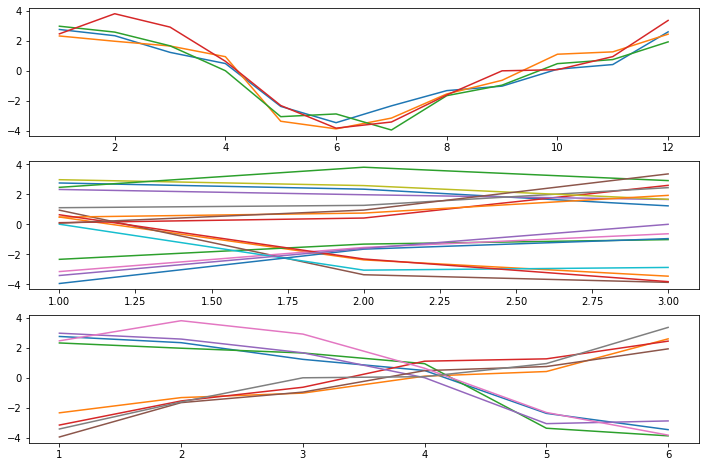

In [ ]:
plt.figure(figsize=(12,8))

i = 1

# for period in ['year','quarter','semester']:
plt.subplot(3,1,1)
period = 'year'
for p in df[period].unique():
  plt.plot( np.arange(1, 12 + 1), df[ df[period] == p ]['values-pred-T'])

plt.subplot(3,1,2)
period = 'quarter'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['values-pred-T'])

plt.subplot(3,1,3)
period = 'semester'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['values-pred-T'])

plt.show()



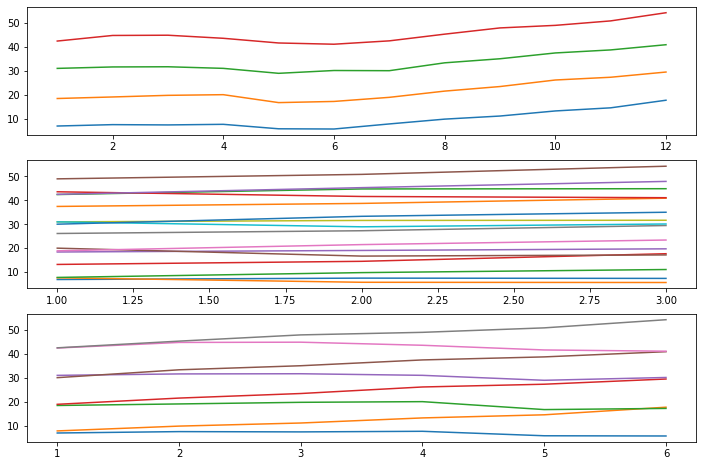

In [ ]:
plt.figure(figsize=(12,8))

i = 1

# for period in ['year','quarter','semester']:
plt.subplot(3,1,1)
period = 'year'
for p in df[period].unique():
  plt.plot( np.arange(1, 12 + 1), df[ df[period] == p ]['values'])

plt.subplot(3,1,2)
period = 'quarter'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['values'])

plt.subplot(3,1,3)
period = 'semester'
for y in df['year'].unique():
  for p in df[period].unique():
    plt.plot( np.arange( len( df[ (df.year == y) & (df[period] == p) ][period] ) ) + 1 , df[ (df.year == y) & (df[period] == p) ]['values'])

plt.show()

In [ ]:
values_month_mean = (df.groupby('month')['values-pred-T'].mean() - df.groupby('month')['values-pred-T'].mean().mean()).values
values_month_mean


array([ 2.63873238,  2.68483593,  1.87611443,  0.52733624, -2.76561599,
       -3.49591452, -3.20069893, -1.52202061, -0.64142162,  0.45210984,
        0.85445286,  2.59208998])

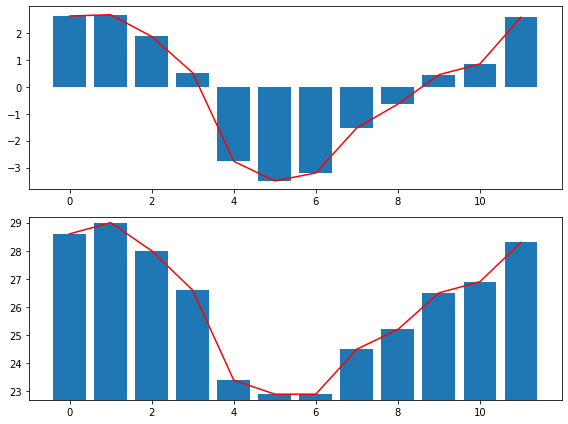

In [ ]:
plt.figure(figsize=(8,6))
    
plt.subplot(2,1,1)
plt.bar(x=np.arange(0,len(a)),height=values_month_mean)
plt.plot(values_month_mean,color='r')

plt.subplot(2,1,2)
plt.bar(x=np.arange(0,len(a_before)),height=a_before)
plt.plot(a_before,color='r')
plt.ylim([a_before.max() - (a.max() - a.min()) - 0.2, a_before.max() + 0.2 ])

plt.tight_layout()
plt.show()

In [ ]:
T = 12
D = np.zeros([n,T])

for i in range(n):
  D[i,i%T] = 1

df['pred-S'] = D @ values_month_mean

In [ ]:
df['pred-values'] = df['pred-T'] + df['pred-S']

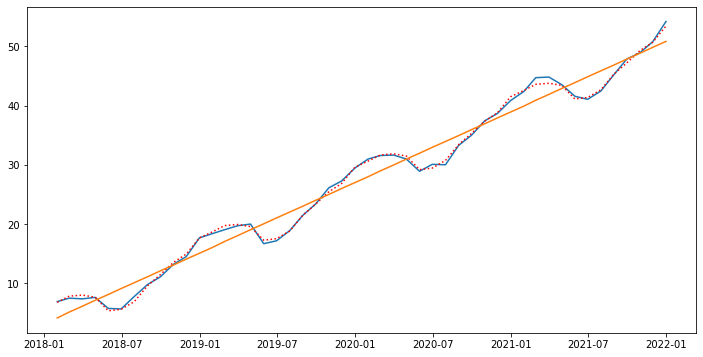

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, df['pred-values'],'r:' )
plt.plot( df.index, model.predict(df.t) )
plt.show()

In [ ]:
# calculate manually
d = df['values'] - df['pred-values']
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 0.3572481966726053
MSE: 0.2044312859156072
RMSE: 0.452140781079972


In [ ]:
np.random.seed(123)
start='1/1/2022'
end='1/1/2023' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(0,len(index_dates),1)



In [ ]:
df_forecast = pd.DataFrame()

df_forecast.index = index_dates
df_forecast['t'] = t

I = df[ df.t == df.t.max() ]['values'].values - df[ df.t == df.t.min() ]['values'].values

forecast_T = model.predict( df_forecast['t'] ) + I 
forecast_S = values_month_mean[0:12]
forecast_values = forecast_T + forecast_S

df_forecast['values'] = forecast_values

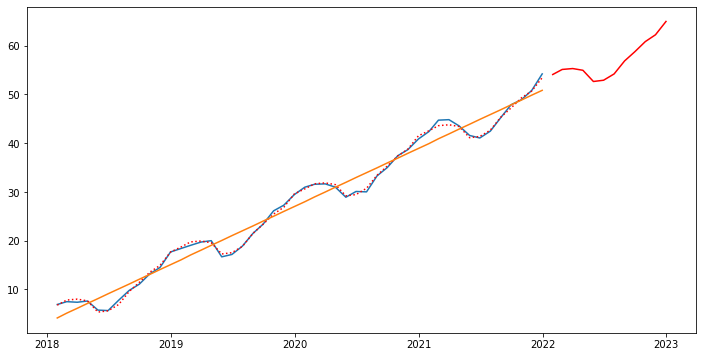

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, df['pred-values'],'r:' )
plt.plot( df.index, model.predict(df.t) )

plt.plot( df_forecast.index, df_forecast['values'],'r' )
plt.show()

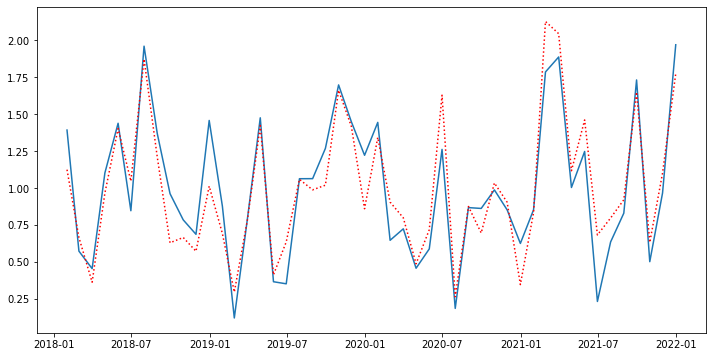

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index,df['R'] )
plt.plot( df.index,d + df['R'].mean(), 'r:' )
plt.show()

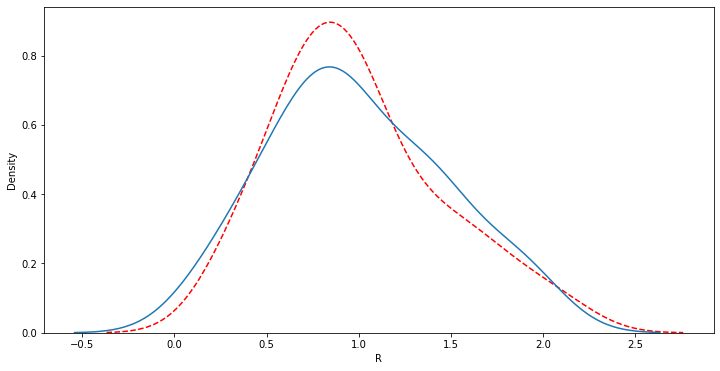

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
sns.kdeplot(d + df['R'].mean(), ax=ax, color='red', linestyle='dashed') 
sns.kdeplot(df['R'], ax=ax)
plt.show()

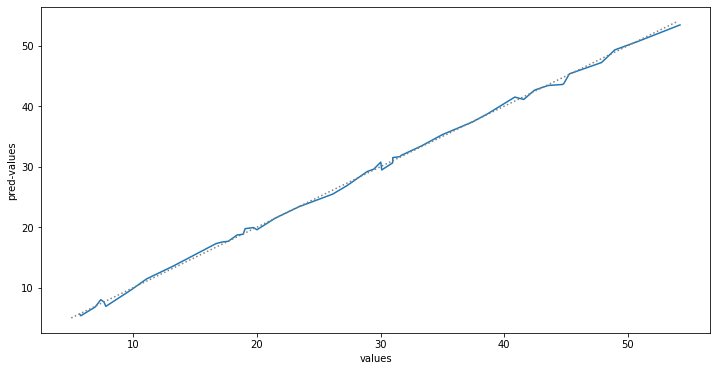

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
sns.lineplot( x=df['values'],y=df['pred-values'])
plt.plot( np.linspace(int( df['values'].min() ),int( df['values'].max() ), 100), np.linspace(int( df['values'].min() ),int( df['values'].max() ), 100),
         color='gray',linestyle='dotted')

plt.show()

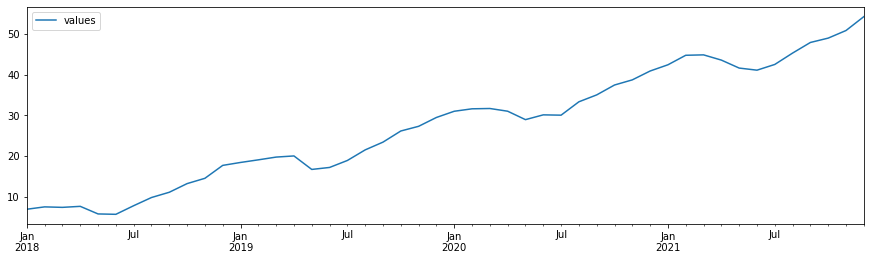

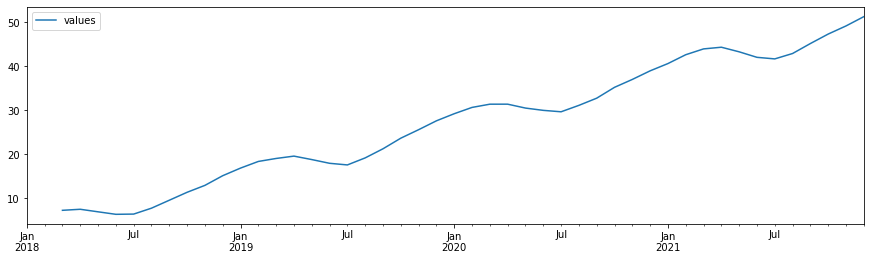

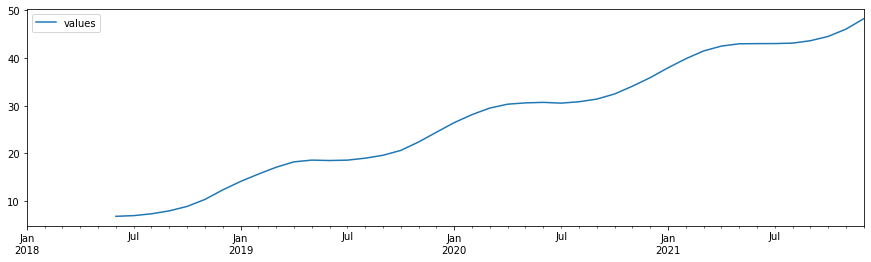

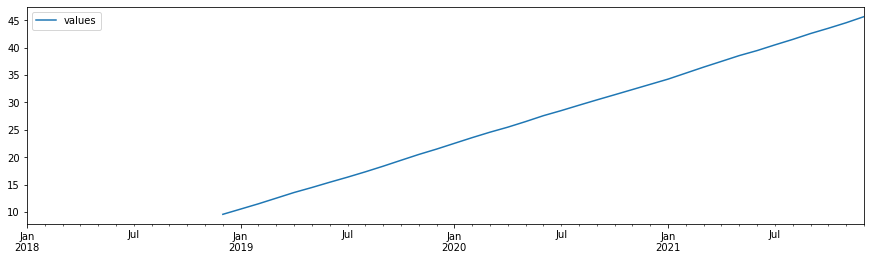

In [ ]:
df[['values']].rolling(1).mean().plot(figsize=(15,4))
df[['values']].rolling(3).mean().plot(figsize=(15,4))
df[['values']].rolling(6).mean().plot(figsize=(15,4))
df[['values']].rolling(12).mean().plot(figsize=(15,4))
plt.show()

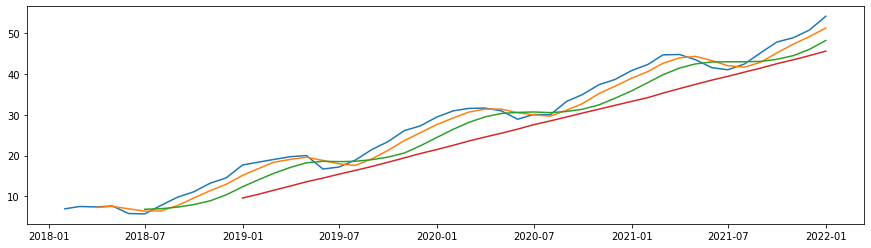

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(df[['values']].rolling(1).mean())
plt.plot(df[['values']].rolling(3).mean())
plt.plot(df[['values']].rolling(6).mean())
plt.plot(df[['values']].rolling(12).mean())
plt.show()

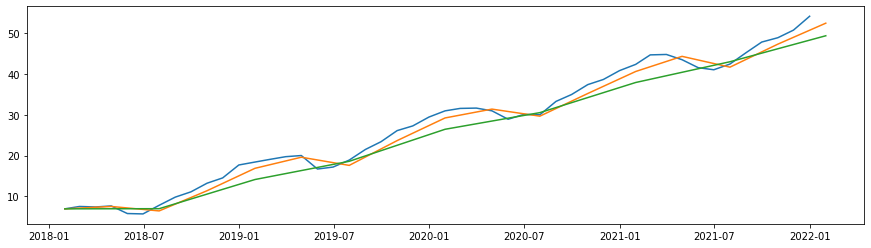

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(df[['values']].resample('M').mean())
plt.plot(df[['values']].resample('3M').mean())
plt.plot(df[['values']].resample('6M').mean())
plt.show()

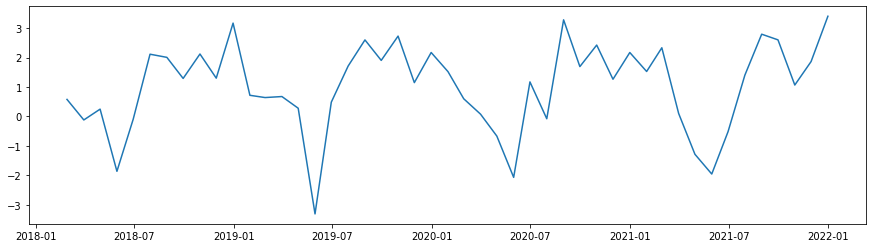

In [ ]:
plt.figure(figsize=(15,4))

plt.plot(df[['values']].diff())
plt.show()

In [ ]:
df[['values-t']] = df[['values']].diff()

values_month_mean = (df.groupby('month')['values-t'].mean() - df.groupby('month')['values-t'].mean().mean()).values
values_month_mean



array([ 0.24554521,  0.02802148, -0.82680358, -1.36686027, -3.31103431,
       -0.7483806 ,  0.27713351,  1.66059624,  0.86251692,  1.07544938,
        0.38426094,  1.71955505])

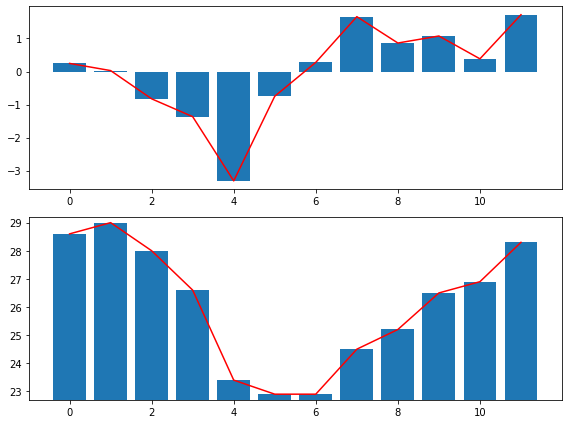

In [ ]:
plt.figure(figsize=(8,6))
    
plt.subplot(2,1,1)
plt.bar(x=np.arange(0,len(a)),height=values_month_mean)
plt.plot(values_month_mean,color='r')

plt.subplot(2,1,2)
plt.bar(x=np.arange(0,len(a_before)),height=a_before)
plt.plot(a_before,color='r')
plt.ylim([a_before.max() - (a.max() - a.min()) - 0.2, a_before.max() + 0.2 ])

plt.tight_layout()
plt.show()

In [ ]:
T = 12
D = np.zeros([n,T])

for i in range(n):
  D[i,i%T] = 1

df['pred-S'] = D @ values_month_mean # + b[0]

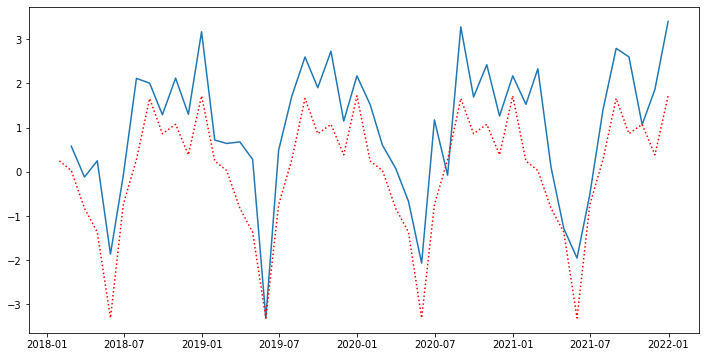

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot(df[['values-t']])
plt.plot( df.index, df['pred-S'],'r:')
plt.show()

In [ ]:
np.array(df['values'])[0]

6.926271704529062

In [ ]:

df['pred-values'] = df['values-t'].cumsum() + df['pred-S'] + np.array(df['values'])[0]

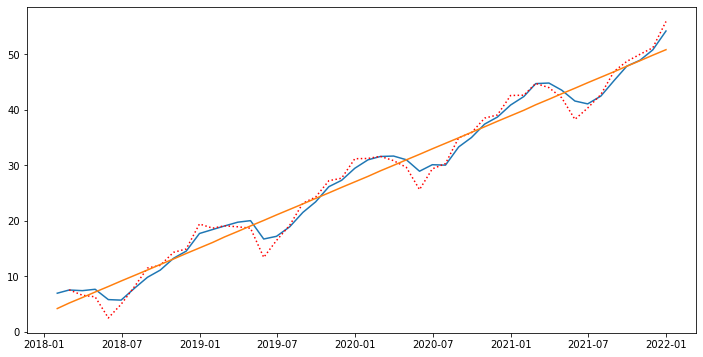

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, df['pred-values'],'r:' )
plt.plot( df.index, model.predict(df.t) )
plt.show()

In [ ]:
# calculate manually
d = df['values'] - df['pred-values']
mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)

print("Results by manual calculation:")
print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)


Results by manual calculation:
MAE: 1.05912946309724
MSE: 1.868967923905033
RMSE: 1.3671020166414183


In [ ]:
np.random.seed(123)
start='1/1/2022'
end='1/1/2023' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(0,len(index_dates),1)



In [ ]:
df_forecast = pd.DataFrame()

df_forecast.index = index_dates
df_forecast['t'] = t

df_forecast

,t
2022-01-31,0
2022-02-28,1
2022-03-31,2
2022-04-30,3
2022-05-31,4
2022-06-30,5
2022-07-31,6
2022-08-31,7
2022-09-30,8
2022-10-31,9


In [ ]:
T = 12
D = np.zeros([n,T])

for i in range(n):
  D[i,i%T] = 1

df['pred-S'] = D @ values_month_mean # + b[0]

In [ ]:




df_forecast['values'] = df['values-t'].cumsum() + df['pred-S'] + np.array(df['values'])[0]

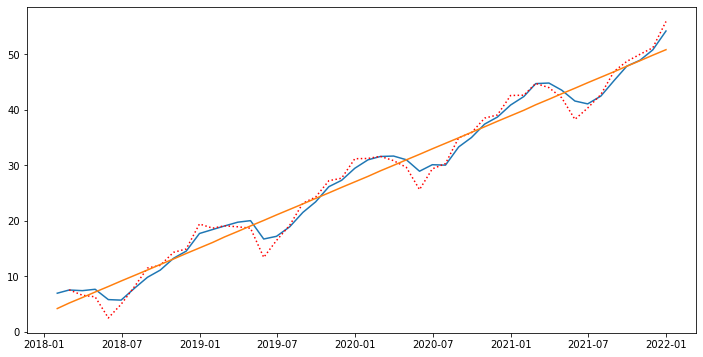

In [ ]:
plt.figure(figsize=(12,6))
    
plt.plot( df.index, df['values'] )
plt.plot( df.index, df['pred-values'],'r:' )
plt.plot( df.index, model.predict(df.t) )

plt.plot( df_forecast.index, df_forecast['values'],'r' )
plt.show()

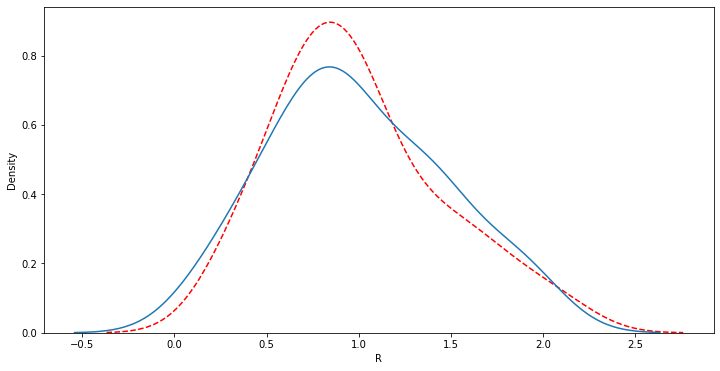

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
sns.kdeplot(d + df['R'].mean(), ax=ax, color='red', linestyle='dashed') 
sns.kdeplot(df['R'], ax=ax)
plt.show()

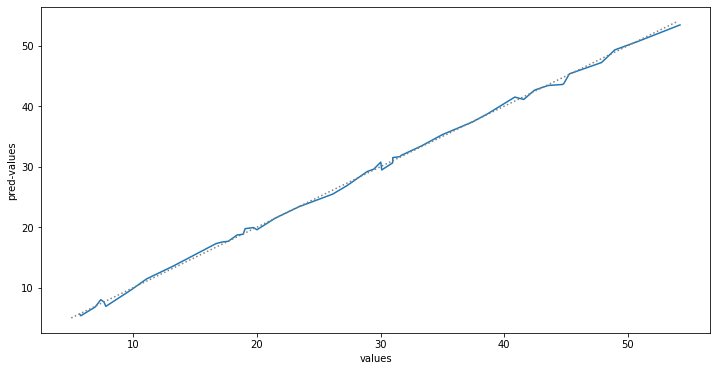

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
    
sns.lineplot( x=df['values'],y=df['pred-values'])
plt.plot( np.linspace(int( df['values'].min() ),int( df['values'].max() ), 100), np.linspace(int( df['values'].min() ),int( df['values'].max() ), 100),
         color='gray',linestyle='dotted')

plt.show()

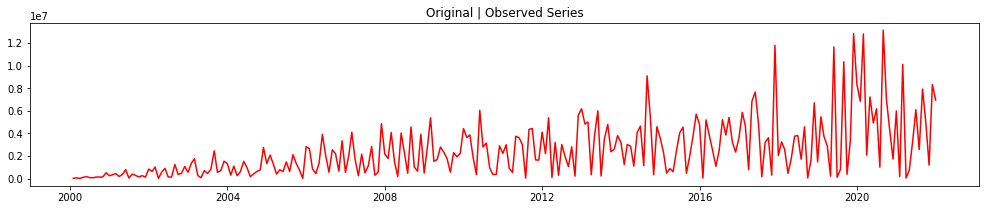

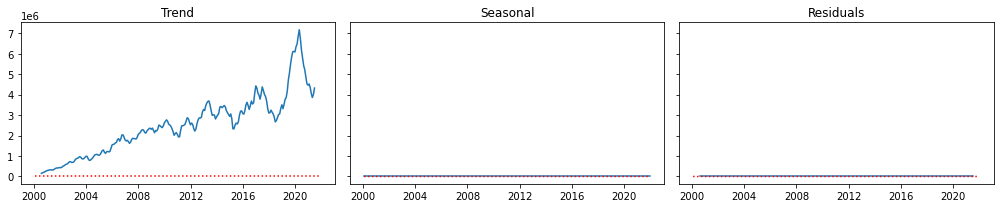

In [ ]:

start='1/1/2000'
end='1/1/2022' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
t = np.arange(0,len(index_dates),1)

scale_T = 1
scale_S = 200
scale_R = 100    

Rt = np.random.rand(len(index_dates))*scale_R

b0 = 1 
b1 = 2
vector_T = np.array([b0, b1])

p = np.poly1d(np.flip(vector_T))

Tt =  p(t)

if freq == 'M': T = 12

Dj = np.ones(12)

sin_phase = 0
cos_phase = 0
sin_scale = 1
cos_scale = 1
sin_T =  2 * np.pi
cos_T =  2 * np.pi
T = 12

St_sin_cos = sin_scale * np.sin(  2 * np.pi / sin_T * np.arange(0,T,1) + sin_phase/2 ) + cos_scale * np.cos( 2 * np.pi / cos_T * np.arange(0,T,1) + cos_phase/2 ) 

St_sin_cos = np.abs( St_sin_cos )

St = np.zeros(len(index_dates))
for i in range(len(index_dates)):
  j = i % T
  St[i] = scale_S * St_sin_cos[j] * Dj[j]


# Xt = Tt + St + Rt

# = np.sin( np.arange(0,len(index_dates),1) * np.pi/4 )  
df = pd.DataFrame()
df.index = index_dates 
df['values'] = Tt * St * Rt
df['values'] = df['values'] + np.abs( df['values'].min() ) + 0.01

plot_series(df['values'], decomp_type='multiplicative')  



In [ ]:
plt.plot(St_sin_cos)

In [ ]:
decomposition = seasonal_decompose(df['values'], model='additive')
  
decomposition.trend.index